In [1]:
# Assignment 2 and 3
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 03.10.2019

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
#1
def random_walk(random):
    counts = len(random)
    array = np.zeros(counts)

    array[0] = 10
    for i in range (1,counts):
        array[i] = array[i-1] + random[i]
    
    return array

c = 300

s2w = np.random.normal(0,28,c)

x = random_walk(s2w)

In [4]:
#2
z = np.zeros(c)
s2n = np.random.normal(0,97,c)

for i in range (0,c):
    z[i] = x[i] + s2n[i]

In [5]:
#3
X = 28**2/97**2

a = (-X + np.sqrt(X**2+4*X))/2
print(a)

0.24998861233121078


In [6]:
#4
M = int(round((2-a)/a))
print(M)

7


In [7]:
#5 Exponential mean
sm_z = np.zeros(c)
sm_z[0]=z[0]
for i in range (1,c):
    sm_z[i] = sm_z[i-1] + a*(z[i]-sm_z[i-1])

In [8]:
#5 Running mean
def rm(array, m):
    length = array.size
    smooth_arr = np.empty([length])
    diff = int((m-1)/2)
    
    #Pre-calculation: mean of the first six entries in dataset
    mean_first = 0
    for i in range (diff):
        mean_first += array[i]
    mean_first /= diff

    #Pre-calculation: mean of the last six entries in dataset
    mean_last = 0
    for i in range (diff):
        mean_last += array[length - i - 1]
    mean_last /= diff 
    
    #Calculation for smoothing data in array including M period points
    for i in range (0,length):
        if i < diff:
            smooth_arr[i] = mean_first
        elif i > (length - diff-1):
            smooth_arr[i] = mean_last
        else:
            sum_it = 0
            for n in range (m):
                it = n - diff
                sum_it += 1/m*array[i-it]
            smooth_arr[i] = sum_it
    return smooth_arr

sm_z_r = rm(z,M)

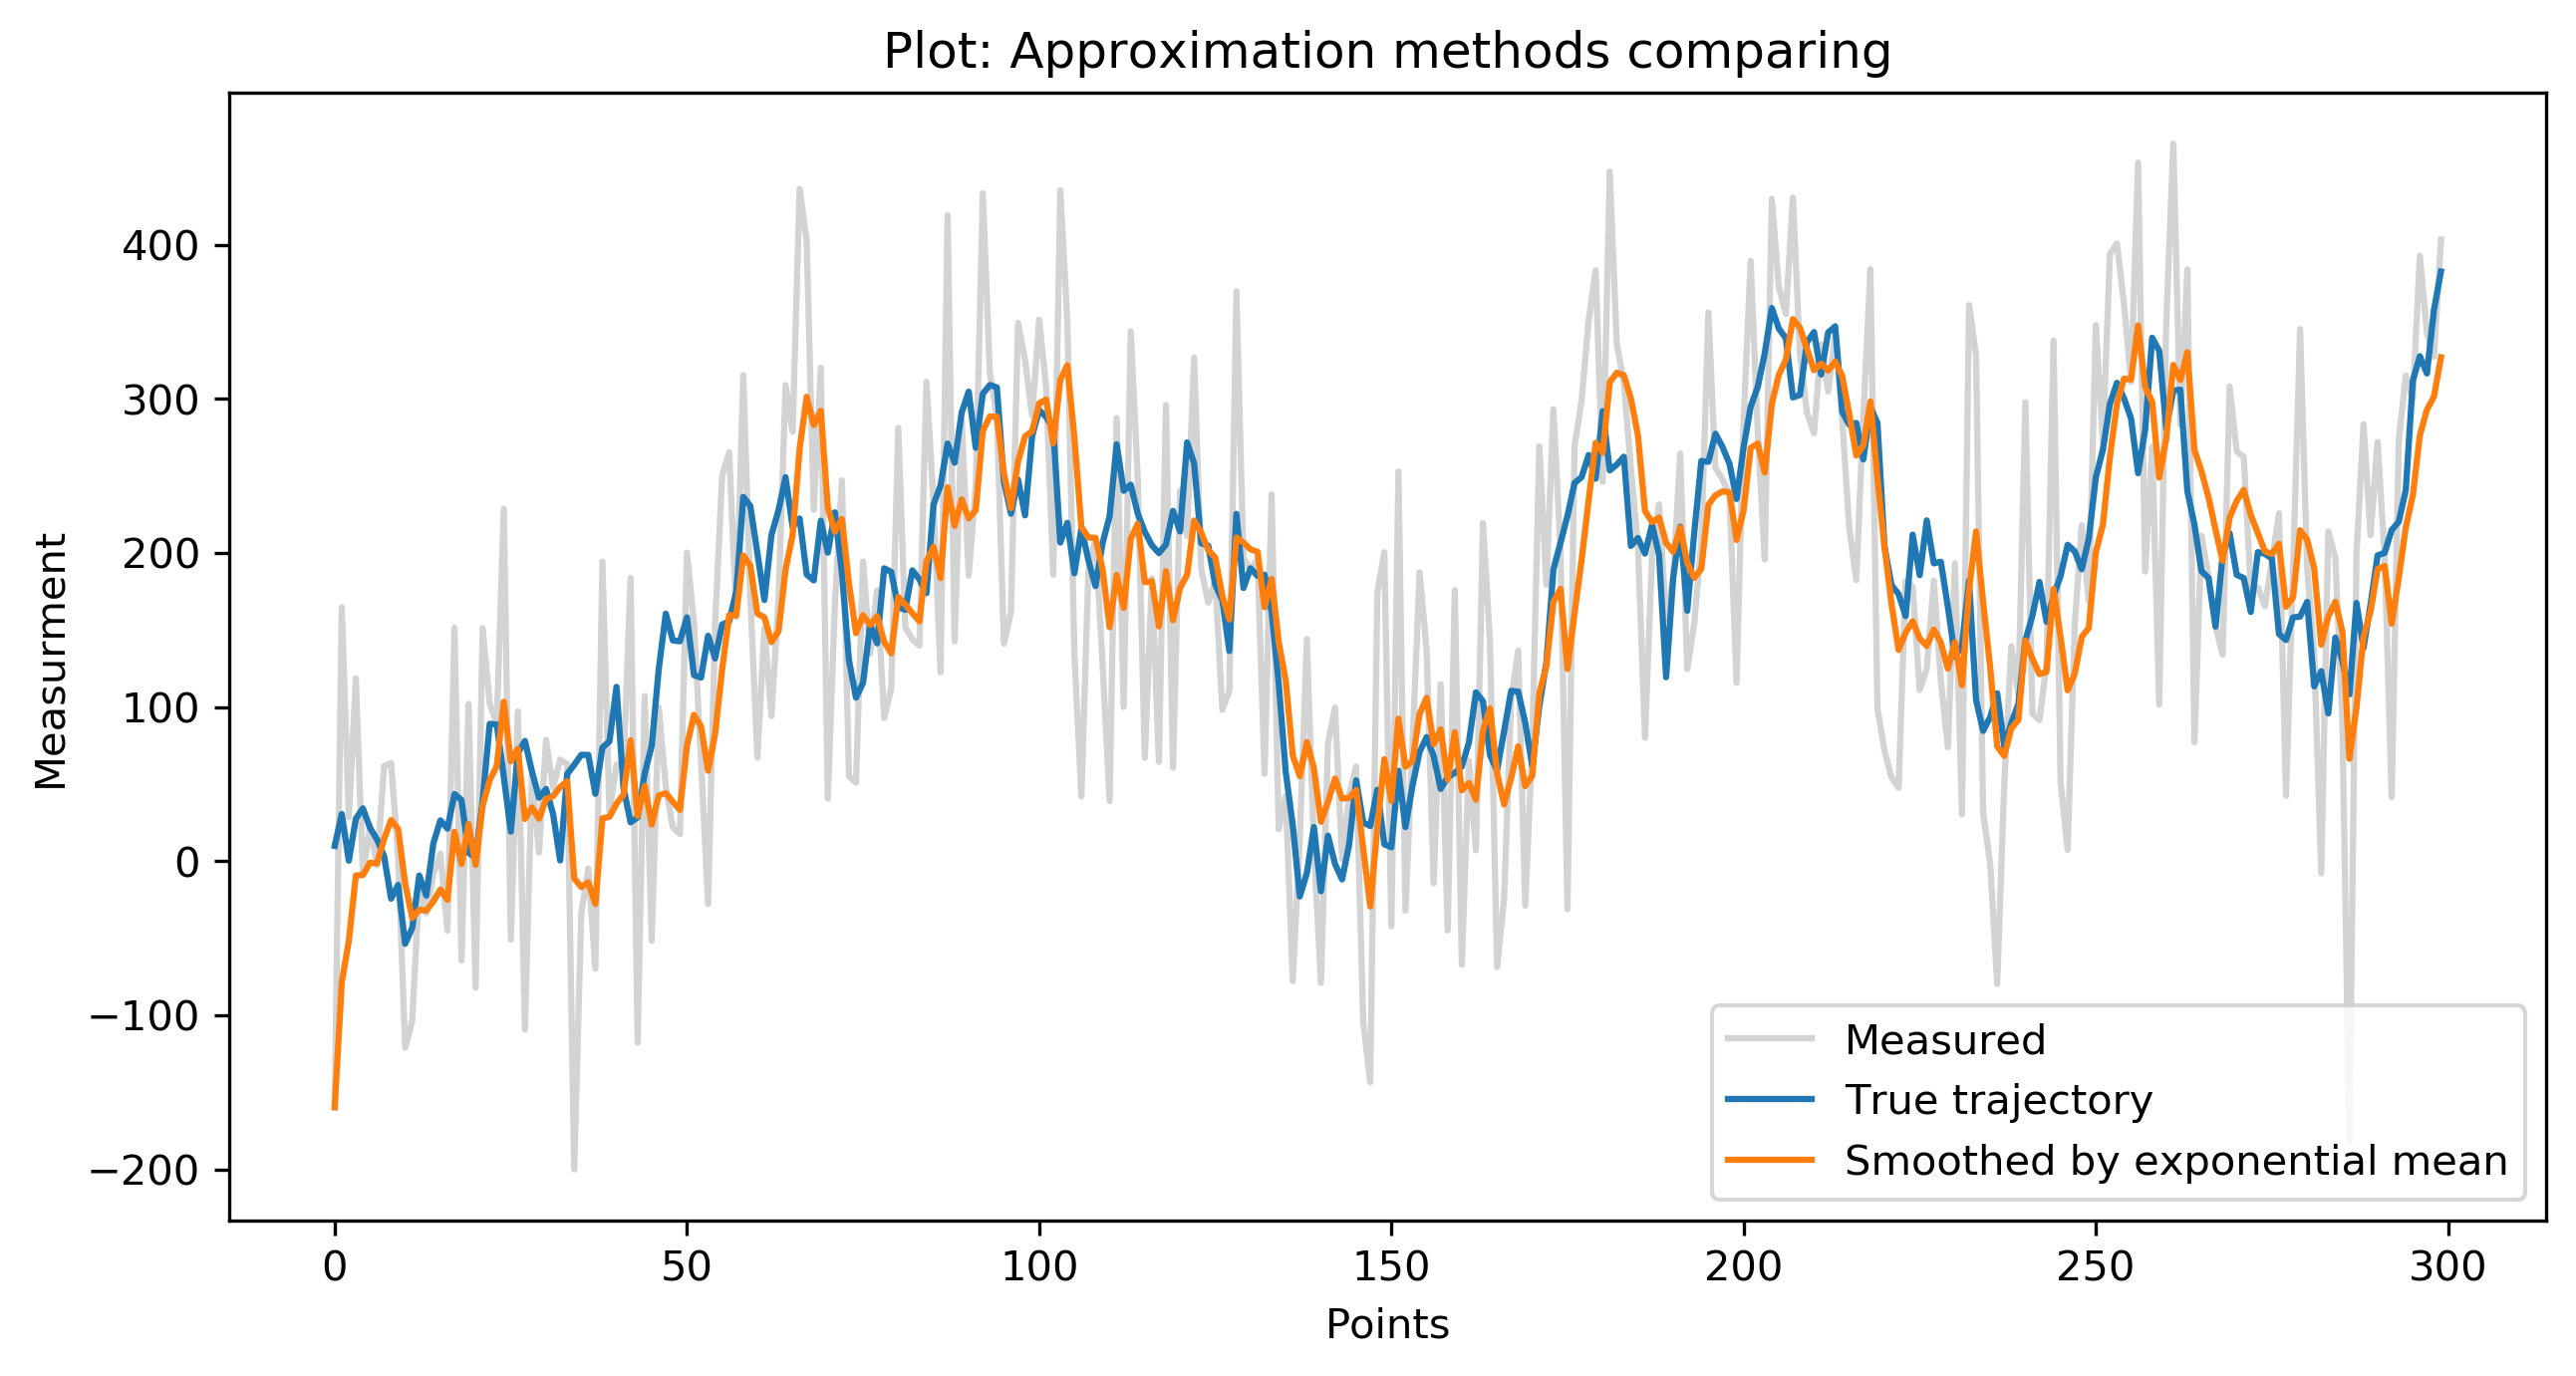

In [9]:
#Assignment 2 Part 6
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Approximation methods comparing') 
plt.plot(z, label='Measured',c='lightgrey')
plt.plot(x, label='True trajectory')
plt.plot(sm_z, label='Smoothed by exponential mean')
plt.xlabel('Points')
plt.ylabel('Measurment')
plt.legend()
plt.show() 

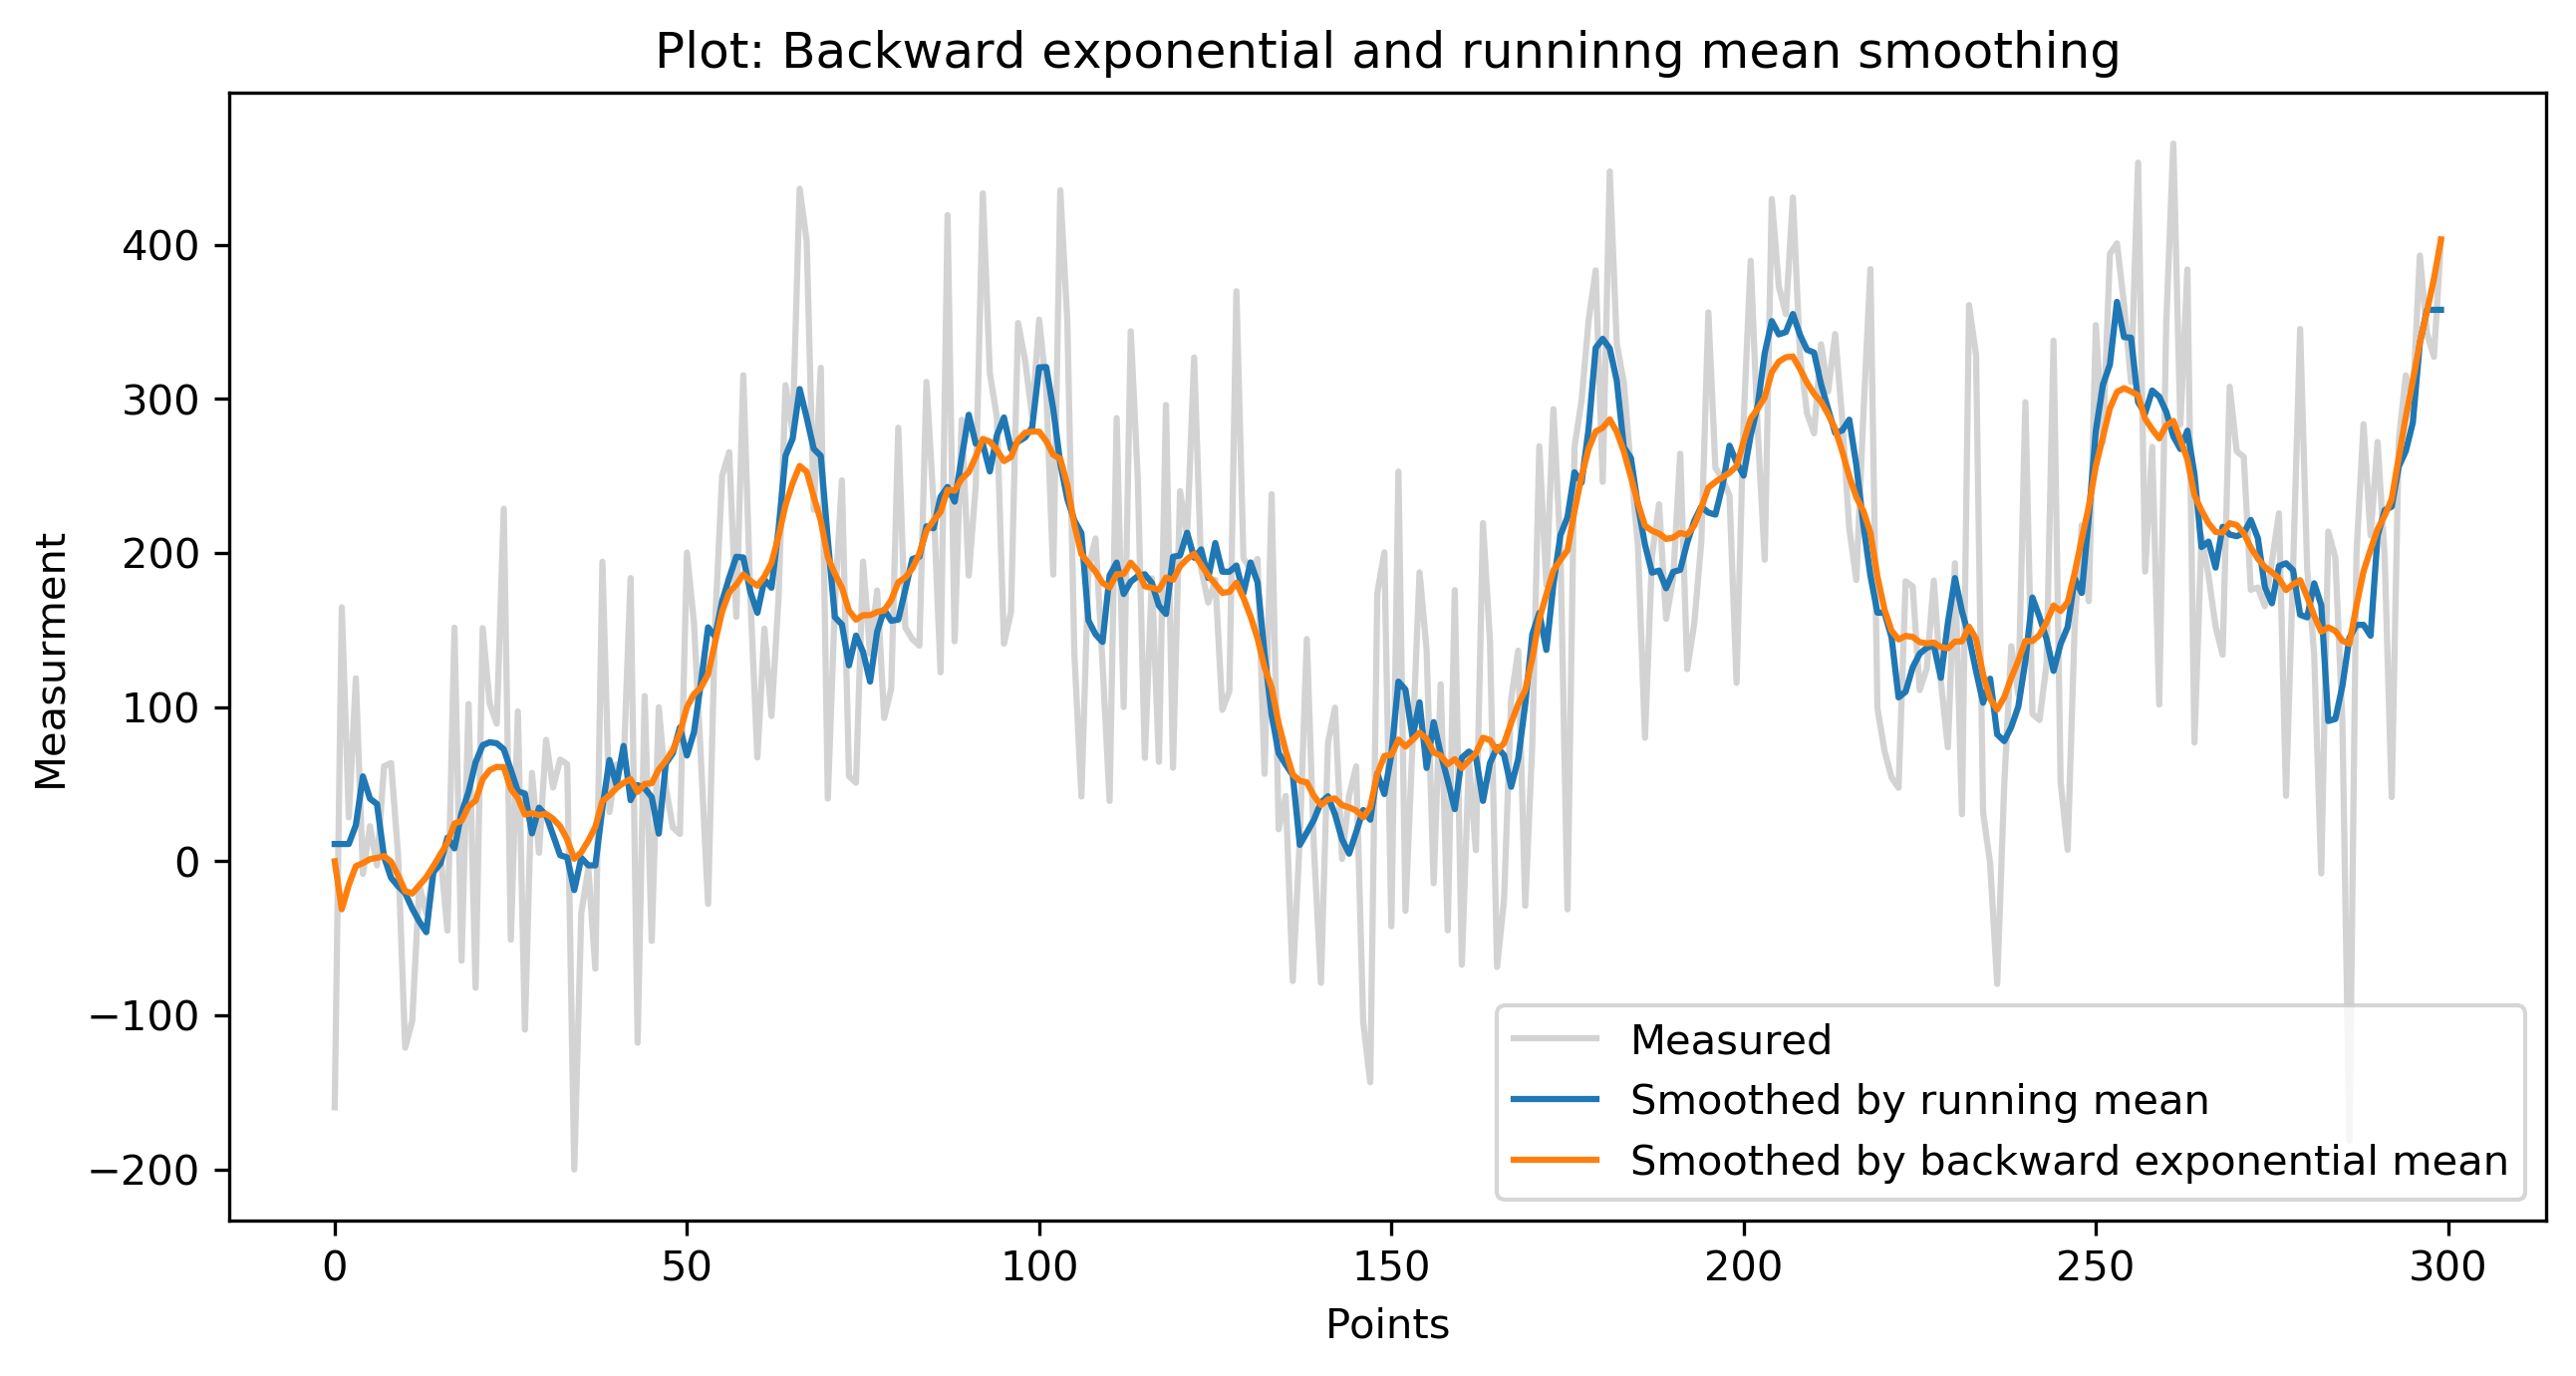

In [15]:
# Assignment 3
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 04.10.2019

#backward smoothing
sm_z_back = np.zeros(c)
length = len(sm_z_back)
sm_z_back[length-1]=z[length-1]
for i in range (length-2,0,-1):
    sm_z_back[i] = sm_z_back[i+1] + a*(sm_z[i]-sm_z_back[i+1])
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Backward exponential and runninng mean smoothing')    
plt.plot(z, label='Measured', c='lightgrey')
plt.plot(sm_z_r, label='Smoothed by running mean')
plt.plot(sm_z_back, label='Smoothed by backward exponential mean')
plt.xlabel('Points')
plt.ylabel('Measurment')
plt.legend()
plt.show() 

In [14]:
def devInd(z,x):  
    Id=[0,0]
    for i in range(0,len(z)):
                Id[0]+=(z[i]-x[i])**2    
    for i in range(0,len(z)-2):
                Id[1]+=(x[i+2]-2*x[i+1]+x[i])**2          
    return Id
Idex=devInd(z,sm_z)
print('Indicator for forward exp. smoothing =',Idex)
Idbex=devInd(z,sm_z_back)
print('Indicator for backward exp. smoothing =',Idbex)

Indicator for forward exp. smoothing = [2126522.1308989194, 442778.4085260831]
Indicator for backward exp. smoothing = [2409214.250412533, 18484.320823410028]
